## QUESTION 1 ##

For analyzing and understanding the waves first:

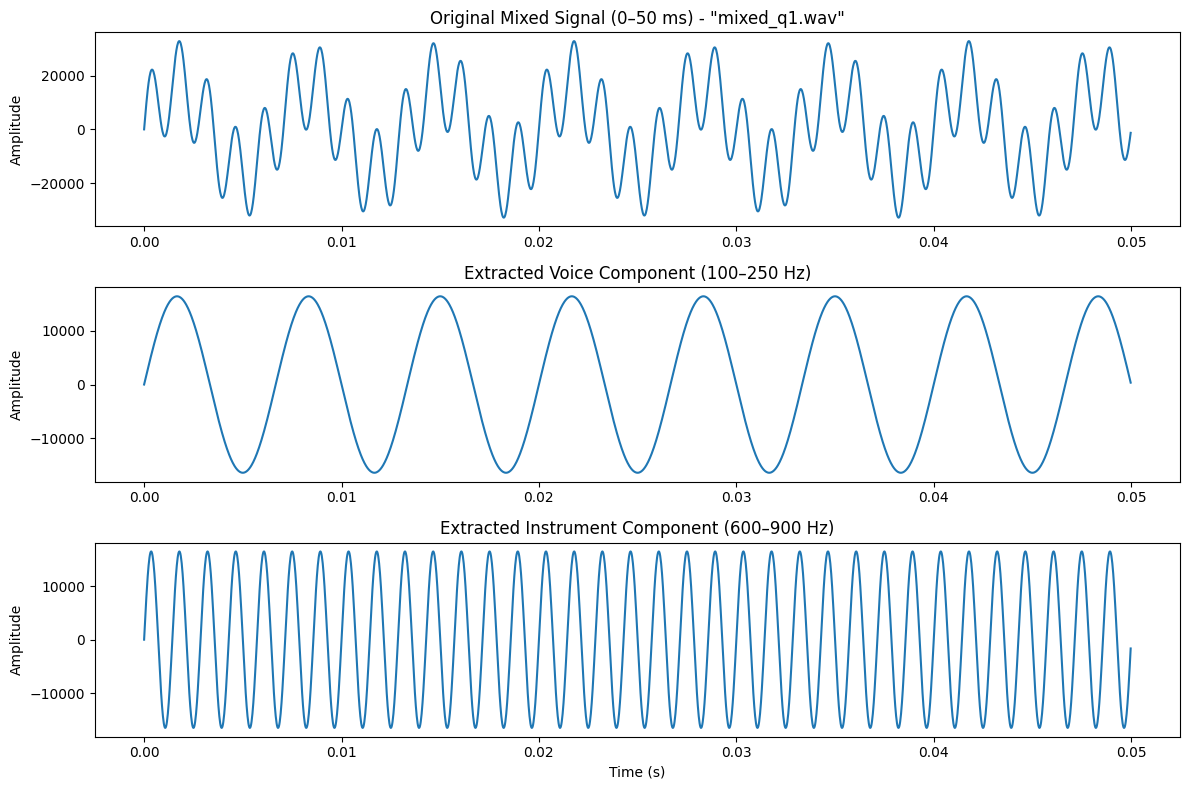

In [28]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

# 1. Load mixed signal
fs, data = wavfile.read('mixed_q1.wav')
if data.ndim > 1:
    data = data.mean(axis=1)

# 2. FFT of the signal
N = len(data)
X = np.fft.rfft(data)
freq = np.fft.rfftfreq(N, d=1/fs)

# 3. Create rectangular band-pass masks
mask_voice = (freq >= 100) & (freq <= 250)
mask_instr = (freq >= 600) & (freq <= 900)

# 4. Apply masks
X_voice = X * mask_voice
X_instr = X * mask_instr

# 5. Inverse FFT to get time-domain separated signals
voice = np.fft.irfft(X_voice, n=N)
instr = np.fft.irfft(X_instr, n=N)

# 6. Plot separated signals (zoomed into first 50 ms)
t = np.arange(N) / fs
zoom_samples = int(0.05 * fs)  # first 50 ms

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t[:zoom_samples], data[:zoom_samples])
plt.title('Original Mixed Signal (0–50 ms) - "mixed_q1.wav"')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(t[:zoom_samples], voice[:zoom_samples])
plt.title('Extracted Voice Component (100–250 Hz)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.plot(t[:zoom_samples], instr[:zoom_samples])
plt.title('Extracted Instrument Component (600–900 Hz)')
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')

plt.tight_layout()
plt.show()

Generating the 2 separate tones and finding the frequency spectra of them:

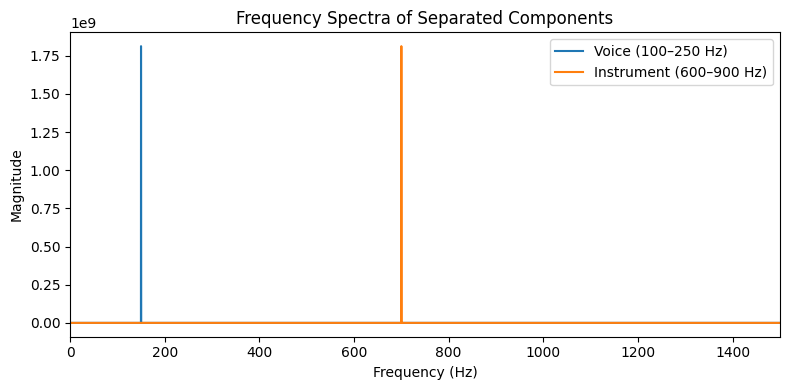

In [29]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

# 1. Load mixed signal
fs, data = wavfile.read('mixed_q1.wav')
if data.ndim > 1:
    data = data.mean(axis=1)

# 2. FFT separation
N = len(data)
X = np.fft.rfft(data)
freq = np.fft.rfftfreq(N, d=1/fs)
mask_voice = (freq >= 100) & (freq <= 250)
mask_instr = (freq >= 600) & (freq <= 900)
X_voice = X * mask_voice
X_instr = X * mask_instr
voice = np.fft.irfft(X_voice, n=N)
instr = np.fft.irfft(X_instr, n=N)

# 3. Normalize and convert to 16-bit PCM
voice_int16 = np.int16(voice / np.max(np.abs(voice)) * 32767)
instr_int16 = np.int16(instr / np.max(np.abs(instr)) * 32767)

# 4. Save to WAV files
wavfile.write('voice_separated_Q1.wav', fs, voice_int16)
wavfile.write('instrument_separated_Q1.wav', fs, instr_int16)

# 5. Compute magnitude spectra
mag_voice = np.abs(X_voice)
mag_instr = np.abs(X_instr)

# 6. Plot and compare spectra
plt.figure(figsize=(8, 4))
plt.plot(freq, mag_voice, label='Voice (100–250 Hz)')
plt.plot(freq, mag_instr, label='Instrument (600–900 Hz)')
plt.xlim(0, 1500)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectra of Separated Components')
plt.legend()
plt.tight_layout()
plt.show()


## QUESTION 2 ##

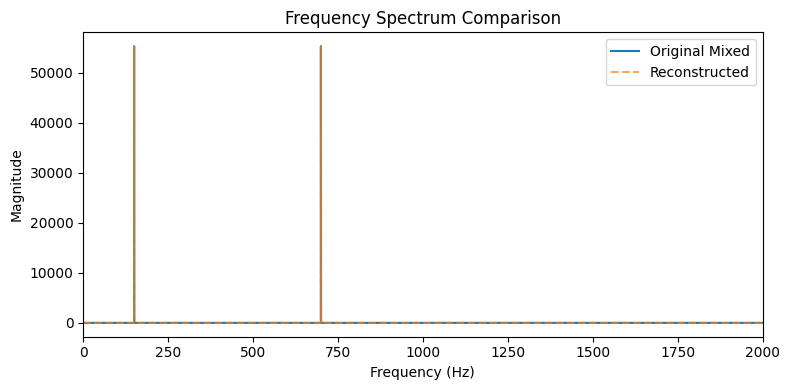

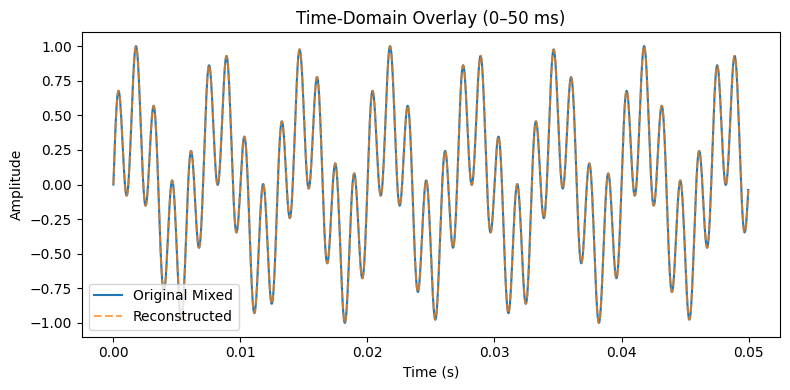

In [30]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

# 1. Load original mixed and separated signals
fs_m, mixed = wavfile.read('mixed_q1.wav')
fs_v, voice = wavfile.read('voice_separated_Q1.wav')
fs_i, instr = wavfile.read('instrument_separated_Q1.wav')

# 2. Convert to float32 in [-1,1]
def to_float(sig):
    if sig.dtype == np.int16:
        return sig.astype(np.float32) / 32767
    return sig.astype(np.float32)

mixed_f = to_float(mixed if mixed.ndim == 1 else mixed.mean(axis=1))
voice_f = to_float(voice if voice.ndim == 1 else voice.mean(axis=1))
instr_f = to_float(instr if instr.ndim == 1 else instr.mean(axis=1))

# 3. Normalize and reconstruct by overlaying
combined = voice_f + instr_f
recon = combined / np.max(np.abs(combined))

# 4. Save reconstructed audio
wavfile.write('reconstructed_Q2.wav', fs_m, (recon * 32767).astype(np.int16))

# 5. Compute FFT magnitudes
N = len(mixed_f)
freq = np.fft.rfftfreq(N, d=1/fs_m)
M_orig = np.abs(np.fft.rfft(mixed_f))
M_recon = np.abs(np.fft.rfft(recon))

# 6. Plot frequency spectra comparison
plt.figure(figsize=(8, 4))
plt.plot(freq, M_orig, label='Original Mixed')
plt.plot(freq, M_recon, '--', label='Reconstructed', alpha=0.7)
plt.xlim(0, 2000)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum Comparison')
plt.legend()
plt.tight_layout()
plt.show()

# 7. Plot time-domain overlay (first 50 ms)
t = np.arange(N) / fs_m
zoom = int(0.05 * fs_m)
plt.figure(figsize=(8, 4))
plt.plot(t[:zoom], mixed_f[:zoom], label='Original Mixed')
plt.plot(t[:zoom], recon[:zoom], '--', label='Reconstructed', alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time‐Domain Overlay (0–50 ms)')
plt.legend()
plt.tight_layout()
plt.show()


## QUESTION 3 ##

Analyzing the 3 wave prototypes (sine - square - triangle) using their time-domain waveforms:

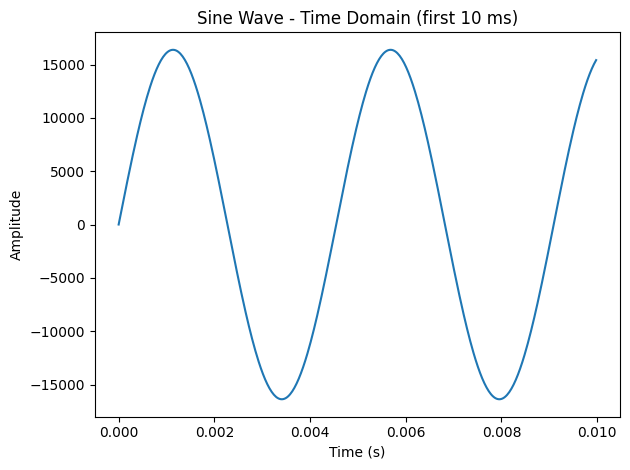

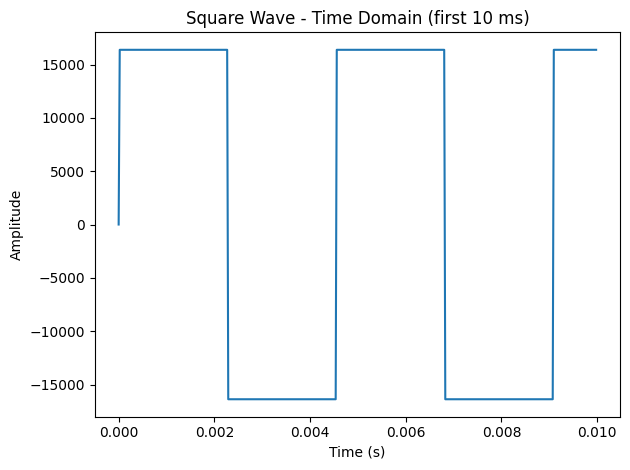

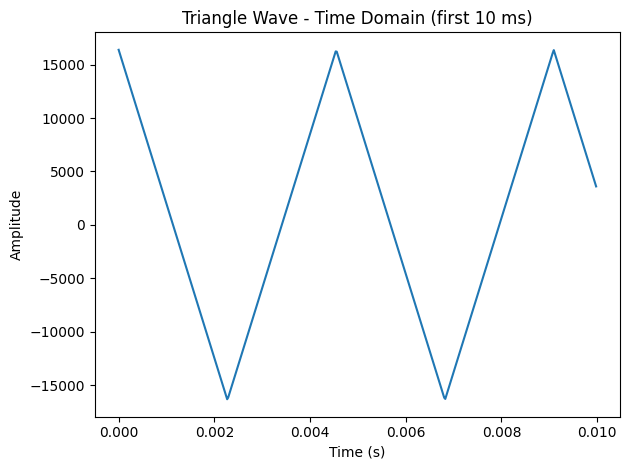

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Define file paths
files = {
    'sine': 'prototype_signals_q3/sine.wav',
    'square': 'prototype_signals_q3/square.wav',
    'triangle': 'prototype_signals_q3/triangle.wav'
}

# Plot time-domain waveform for each signal
for name, path in files.items():
    # Load audio
    fs, data = wavfile.read(path)
    # If stereo, convert to mono
    if data.ndim > 1:
        data = data.mean(axis=1)
    # Select the first 10 ms for clarity
    zoom_time = 0.010  # seconds
    zoom_samples = int(zoom_time * fs)
    t = np.arange(zoom_samples) / fs
    sig = data[:zoom_samples]

    # Create a separate figure for each waveform
    plt.figure()
    plt.plot(t, sig)
    plt.title(f'{name.capitalize()} Wave - Time Domain (first {int(zoom_time*1000)} ms)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()


Computing the 4-point and 8-point DFTs of all the 3 waveform types: sine, square, and triangle:

In [32]:
import numpy as np
from scipy.io import wavfile

def compute_dft(x, N):
    """
    Compute the N-point Discrete Fourier Transform (DFT) of the input sequence x.
    
    Args:
        x (numpy.ndarray): 1-D array containing at least N time-domain samples.
        N (int): Number of DFT points (length of the transform).
        
    Returns:
        numpy.ndarray: Complex array of length N representing X[k] for k=0…N-1.
    """
    X = np.zeros(N, dtype=complex)
    # Direct implementation of the DFT definition:
    #    X[k] = sum_{n=0..N-1} x[n] * exp(-j*2*pi*k*n/N)
    for k in range(N):
        total = 0+0j
        for n in range(N):
            angle = -2j * np.pi * k * n / N
            total += x[n] * np.exp(angle)
        X[k] = total
    return X

def analyze_waveforms(paths, Ns=(4, 8)):
    """
    For each file in paths, load the waveform, extract the first N samples,
    compute the N-point DFT for each N in Ns, and display the results.
    
    Args:
        paths (dict): Mapping from waveform name to file path.
        Ns (tuple): Tuple of DFT sizes to compute (e.g., (4,8)).
    """
    for name, path in paths.items():
        # 1. Load audio data
        fs, data = wavfile.read(path)
        # If stereo, convert to mono by averaging channels
        if data.ndim > 1:
            data = data.mean(axis=1)
        # Cast to float for accurate DFT computation
        data = data.astype(np.float64)
        
        print(f"\n=== {name.capitalize()} Waveform ===")
        for N in Ns:
            # 2. Extract the first N samples
            block = data[:N]
            
            # 3. Compute the N-point DFT
            X = compute_dft(block, N)
            
            # 4. Display the results in a table
            print(f"\n-- {N}-point DFT --")
            print("k\tReal(X[k])\tImag(X[k])\t|X[k]|")
            for k in range(N):
                re, im = X[k].real, X[k].imag
                mag = np.abs(X[k])
                print(f"{k}\t{re:.2f}\t\t{im:.2f}\t\t{mag:.2f}")

if __name__ == "__main__":
    # Paths to the prototype waveforms
    wave_files = {
        'sine': 'prototype_signals_q3/sine.wav',
        'square': 'prototype_signals_q3/square.wav',
        'triangle': 'prototype_signals_q3/triangle.wav'
    }
    # Compute and print 4- and 8-point DFTs for each waveform
    analyze_waveforms(wave_files, Ns=(4, 8))



=== Sine Waveform ===

-- 4-point DFT --
k	Real(X[k])	Imag(X[k])	|X[k]|
0	3077.00		0.00		3077.00
1	-1026.00		1025.00		1450.28
2	-1025.00		-0.00		1025.00
3	-1026.00		-1025.00		1450.28

-- 8-point DFT --
k	Real(X[k])	Imag(X[k])	|X[k]|
0	14310.00		0.00		14310.00
1	-2060.02		4915.63		5329.83
2	-2041.00		2033.00		2880.76
3	-2035.98		841.63		2203.08
4	-2036.00		-0.00		2036.00
5	-2035.98		-841.63		2203.08
6	-2041.00		-2033.00		2880.76
7	-2060.02		-4915.63		5329.83

=== Square Waveform ===

-- 4-point DFT --
k	Real(X[k])	Imag(X[k])	|X[k]|
0	49149.00		0.00		49149.00
1	-16383.00		-0.00		16383.00
2	-16383.00		-0.00		16383.00
3	-16383.00		-0.00		16383.00

-- 8-point DFT --
k	Real(X[k])	Imag(X[k])	|X[k]|
0	114681.00		0.00		114681.00
1	-16383.00		0.00		16383.00
2	-16383.00		-0.00		16383.00
3	-16383.00		0.00		16383.00
4	-16383.00		-0.00		16383.00
5	-16383.00		-0.00		16383.00
6	-16383.00		-0.00		16383.00
7	-16383.00		0.00		16383.00

=== Triangle Waveform ===

-- 4-point DFT --
k	Real(X[k])	Imag(X[k])

To make sure of the values, we also try the built-in `np.fft.fft` in python and compare:

In [33]:
import numpy as np
from scipy.io import wavfile

def compute_dft(x, N):
    """
    Manual N-point DFT computation based on the definition:
        X[k] = sum_{n=0..N-1} x[n] * exp(-j * 2*pi * k * n / N)
    Args:
        x (np.ndarray): 1-D real input samples (length >= N)
        N (int): Number of DFT points
    Returns:
        X (np.ndarray): Complex DFT output of length N
    """
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        total = 0 + 0j
        for n in range(N):
            angle = -2j * np.pi * k * n / N
            total += x[n] * np.exp(angle)
        X[k] = total
    return X

def compare_dft_methods(block, N):
    """
    Compute N-point DFT of 'block' both manually and via NumPy FFT,
    and return both results for comparison.
    """
    # Manual DFT
    X_manual = compute_dft(block, N)
    # NumPy FFT
    X_fft = np.fft.fft(block, n=N)
    return X_manual, X_fft

def analyze_all_waveforms(paths, Ns=(4, 8)):
    """
    For each waveform file, compute and compare manual vs. FFT-based DFTs
    for each N in Ns, then print out a detailed table.
    """
    for name, path in paths.items():
        # Load and prepare the audio signal
        fs, data = wavfile.read(path)
        if data.ndim > 1:
            data = data.mean(axis=1)  # convert stereo to mono
        data = data.astype(np.float64)
        
        print(f"\n===== {name.capitalize()} Wave =====")
        for N in Ns:
            # Extract first N samples for the DFT block
            block = data[:N]
            
            # Compute both DFTs
            X_manual, X_fft = compare_dft_methods(block, N)
            
            # Print header
            print(f"\n--- {N}-point DFT comparison ---")
            print("k | Manual Re    Manual Im    FFT Re       FFT Im     |Δ Re         Δ Im")
            print("--|----------------------------------------------------------------------------")
            
            # Print each bin's values side by side
            for k in range(N):
                m_re, m_im = X_manual[k].real, X_manual[k].imag
                f_re, f_im = X_fft[k].real, X_fft[k].imag
                d_re, d_im = m_re - f_re, m_im - f_im
                print(f"{k:1d} | {m_re:10.2f} {m_im:10.2f}  {f_re:10.2f} {f_im:10.2f}  | {d_re:+10.2e} {d_im:+10.2e}")
                
if __name__ == "__main__":
    # Paths to prototype waveforms
    wave_files = {
        'sine': 'prototype_signals_q3/sine.wav',
        'square': 'prototype_signals_q3/square.wav',
        'triangle': 'prototype_signals_q3/triangle.wav'
    }
    # Run the analysis for both 4- and 8-point DFTs
    analyze_all_waveforms(wave_files, Ns=(4, 8))



===== Sine Wave =====

--- 4-point DFT comparison ---
k | Manual Re    Manual Im    FFT Re       FFT Im     |Δ Re         Δ Im
--|----------------------------------------------------------------------------
0 |    3077.00       0.00     3077.00       0.00  |  +0.00e+00  +0.00e+00
1 |   -1026.00    1025.00    -1026.00    1025.00  |  -2.27e-13  +0.00e+00
2 |   -1025.00      -0.00    -1025.00       0.00  |  +0.00e+00  -3.77e-13
3 |   -1026.00   -1025.00    -1026.00   -1025.00  |  +9.09e-13  -4.55e-13

--- 8-point DFT comparison ---
k | Manual Re    Manual Im    FFT Re       FFT Im     |Δ Re         Δ Im
--|----------------------------------------------------------------------------
0 |   14310.00       0.00    14310.00       0.00  |  +0.00e+00  +0.00e+00
1 |   -2060.02    4915.63    -2060.02    4915.63  |  -1.36e-12  +0.00e+00
2 |   -2041.00    2033.00    -2041.00    2033.00  |  -1.14e-12  -6.82e-13
3 |   -2035.98     841.63    -2035.98     841.63  |  -2.27e-13  +2.05e-12
4 |   -2036.00 

Before starting to classifying the samples, let us analyze their time-domain waveforms:

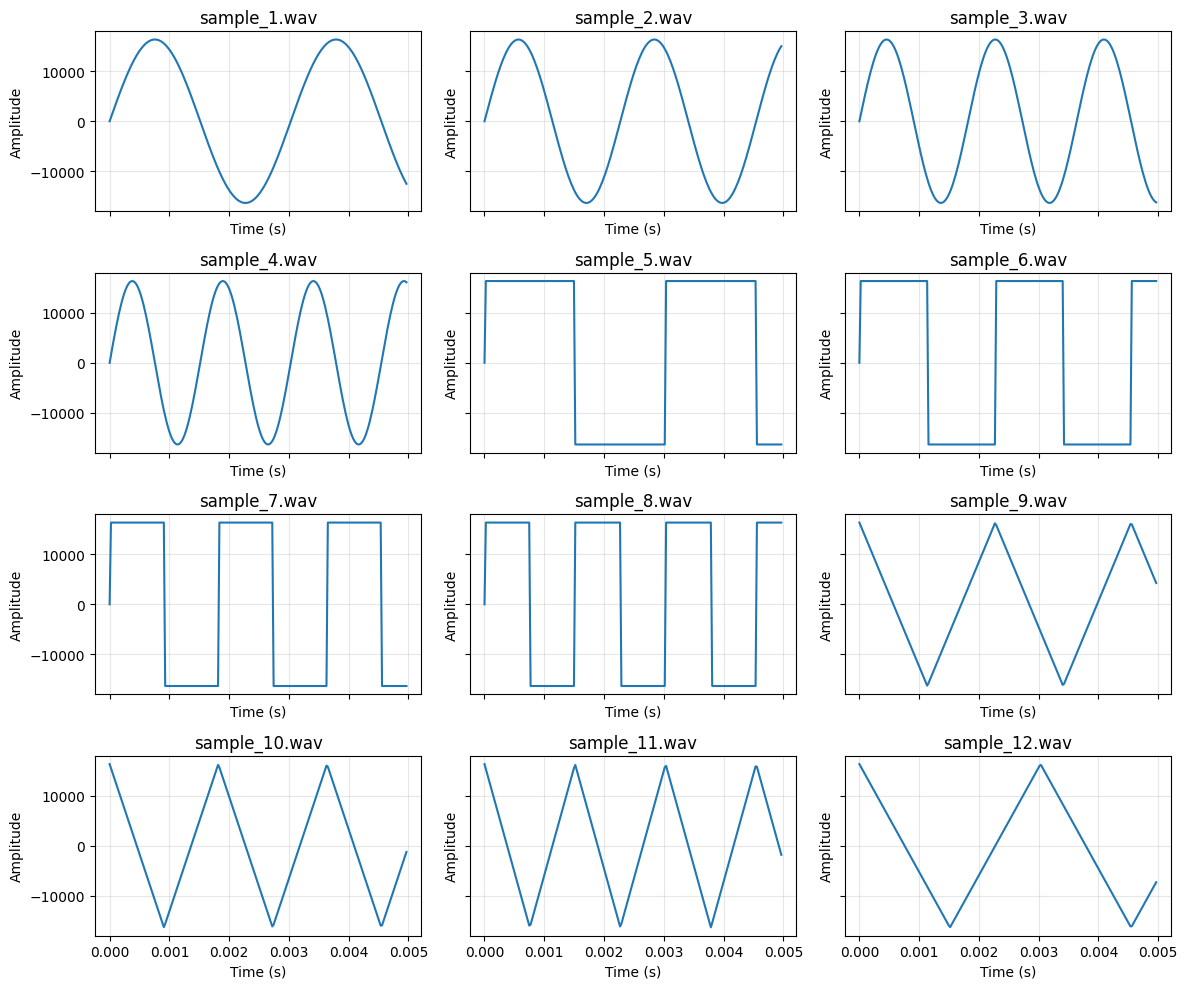

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import glob
import os
import re

# Helper to sort files numerically by the index in their filename
def numeric_sort_key(path):
    # Extract the first integer found in the basename (e.g., 'sample_12.wav' → 12)
    name = os.path.basename(path)
    num = re.search(r'\d+', name).group()
    return int(num)

# List all 12 sample files and sort them numerically
files = glob.glob('signals_q3/sample_*.wav')
files.sort(key=numeric_sort_key)

# How much time to display (in seconds)
zoom_time = 0.005  # 5 ms

# Determine grid layout: 3 columns
n_files = len(files)
cols = 3
rows = int(np.ceil(n_files / cols))

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*2.5), sharex=True, sharey=True)
axes = axes.flatten()

for ax, path in zip(axes, files):
    # 1. Load and convert to mono
    fs, data = wavfile.read(path)
    if data.ndim > 1:
        data = data.mean(axis=1)
    data = data.astype(np.float32)
    
    # 2. Extract zoom window
    zoom_samples = int(zoom_time * fs)
    t = np.arange(zoom_samples) / fs
    segment = data[:zoom_samples]
    
    # 3. Plot
    ax.plot(t, segment)
    ax.set_title(os.path.basename(path))
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude')
    ax.grid(alpha=0.3)

# Remove any unused axes
for ax in axes[n_files:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


Comparing and Classifying the given dataset (sample_1.wav to sample_12.wav) - Using a simple prediction technique

In [35]:
import numpy as np
from scipy.io import wavfile
import glob, os, re

def load_block(path, N):
    fs, data = wavfile.read(path)
    if data.ndim > 1:
        data = data.mean(axis=1)
    return data[:N].astype(np.float64)

def prototype_library(proto_paths, Ns=(4,8)):
    protos = {}
    for label, path in proto_paths.items():
        protos[label] = {}
        for N in Ns:
            x = load_block(path, N)
            protos[label][N] = np.abs(np.fft.fft(x, n=N))
    return protos

def classify_by_nearest(sample_path, protos, Ns=(4,8)):
    dists = {lab:0.0 for lab in protos}
    for N in Ns:
        x = load_block(sample_path, N)
        m = np.abs(np.fft.fft(x, n=N))
        for lab in protos:
            p = protos[lab][N]
            dists[lab] += np.sum((m - p)**2)
    return min(dists, key=lambda k: dists[k])

def batch_classify(folder="signals_q3", pattern="sample_*.wav"):
    # 1) Prototype files in prototype_signals_q3
    proto_paths = {
        'sine':     'prototype_signals_q3/sine.wav',
        'square':   'prototype_signals_q3/square.wav',
        'triangle': 'prototype_signals_q3/triangle.wav'
    }
    protos = prototype_library(proto_paths, Ns=(4,8))

    # 2) Find all sample_*.wav numerically sorted
    def numeric_key(p):
        return int(re.search(r'\d+', os.path.basename(p)).group())
    files = sorted(glob.glob(f"{folder}/{pattern}"), key=numeric_key)

    # 3) Classify and print
    print("file         → predicted")
    print("-------------------------")
    for p in files:
        lab = classify_by_nearest(p, protos, Ns=(4,8))
        print(f"{os.path.basename(p):12} → {lab}")

# **Now actually run it**
batch_classify()


file         → predicted
-------------------------
sample_1.wav → sine
sample_2.wav → sine
sample_3.wav → sine
sample_4.wav → sine
sample_5.wav → square
sample_6.wav → square
sample_7.wav → square
sample_8.wav → square
sample_9.wav → triangle
sample_10.wav → triangle
sample_11.wav → triangle
sample_12.wav → triangle


' Task ': Use 4-point and 8-point DFT to extract features from each signal. Based on these features, determine which signal corresponds to which waveform type. Explain your approach and reasoning.

In [36]:
import numpy as np
import pandas as pd
from scipy.io import wavfile
import glob
import os
import re

def load_block(path, N):
    fs, data = wavfile.read(path)
    if data.ndim > 1:
        data = data.mean(axis=1)
    return data[:N].astype(np.float64)

def dft_magnitude(x, N):
    return np.abs(np.fft.fft(x, n=N))

def numeric_sort(files):
    return sorted(files, key=lambda p: int(re.search(r'\d+', os.path.basename(p)).group()))

# 1) Build prototype DFT feature table
proto_paths = {
    'sine':     'Prototype_signals_q3/sine.wav',
    'square':   'Prototype_signals_q3/square.wav',
    'triangle': 'Prototype_signals_q3/triangle.wav'
}
proto_records = []
for label, path in proto_paths.items():
    mags4 = dft_magnitude(load_block(path, 4), 4).tolist()
    mags8 = dft_magnitude(load_block(path, 8), 8).tolist()
    proto_records.append({'Waveform': label, '4-pt DFT mags': mags4, '8-pt DFT mags': mags8})
protos_df = pd.DataFrame(proto_records)

# Display prototype table
print("Prototype Waveform DFT Features")
print(protos_df)

# 2) Classify samples and build sample table
protos = {label: {'4': np.array(rec['4-pt DFT mags']),
                  '8': np.array(rec['8-pt DFT mags'])}
          for label, rec in zip(protos_df['Waveform'], proto_records)}

sample_paths = numeric_sort(glob.glob('signals_q3/sample_*.wav'))
sample_records = []
for path in sample_paths:
    fname = os.path.basename(path)
    mags4 = dft_magnitude(load_block(path, 4), 4)
    mags8 = dft_magnitude(load_block(path, 8), 8)
    # compute distances
    dists = {}
    for label in protos:
        diff4 = mags4 - protos[label]['4']
        diff8 = mags8 - protos[label]['8']
        dists[label] = np.sum(diff4**2) + np.sum(diff8**2)
    pred = min(dists, key=dists.get)
    sample_records.append({
        'Sample': fname,
        '4-pt DFT mags': mags4.tolist(),
        '8-pt DFT mags': mags8.tolist(),
        'sine_dist': dists['sine'],
        'square_dist': dists['square'],
        'triangle_dist': dists['triangle'],
        'Predicted': pred
    })
samples_df = pd.DataFrame(sample_records)

# Display sample classification table
print("Sample DFT Classification")
print(samples_df)


Prototype Waveform DFT Features
   Waveform                                      4-pt DFT mags  \
0      sine  [3077.0, 1450.276180594579, 1025.0, 1450.27618...   
1    square               [49149.0, 16383.0, 16383.0, 16383.0]   
2  triangle  [63570.0, 924.8956697920042, 654.0, 924.895669...   

                                       8-pt DFT mags  
0  [14310.0, 5329.833095931701, 2880.758580651978...  
1  [114681.0, 16383.0, 16383.0, 16383.0, 16383.0,...  
2  [121909.0, 3417.5861575608833, 1849.0843680048...  
Sample DFT Classification
           Sample                                      4-pt DFT mags  \
0    sample_1.wav  [4611.0, 2171.52780318374, 1535.0, 2171.527803...   
1    sample_2.wav  [6137.0, 2888.541673578555, 2041.0, 2888.54167...   
2    sample_3.wav  [7655.0, 3599.9173601625916, 2541.0, 3599.9173...   
3    sample_4.wav  [9161.0, 4302.842432625206, 3035.0, 4302.84243...   
4    sample_5.wav               [49149.0, 16383.0, 16383.0, 16383.0]   
5    sample_6.wav        